<a href="https://colab.research.google.com/github/Madinanachan/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [1]:
import sympy as sym #Using Sympy library to simplify/represent expressions

x=sym.symbols('x')

x-x


0

In [2]:
m, n= sym.symbols('m, n')

sqrs=(m-n)**2
sqrs

(m - n)**2

In [3]:
sym.init_printing() #puts the expression into more pleasant form
sqrs

In [4]:
sqrs.expand() #expands expressions

In [11]:

sym.limit(1/x,x,0,dir="-") #Computes limits

In [15]:
#Can differentiate and integrate symbols
sym.diff(sym.sin(x**2), x)


In [16]:
sym.integrate(x ** 2 - sym.cos(x), x)

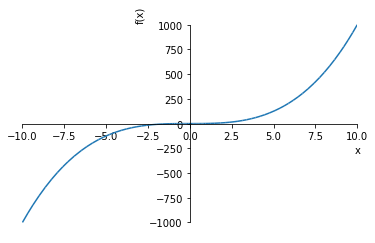

In [13]:
#In tandem with matplotlib we can plot general equations

%matplotlib inline

cubic=x**3
p=sym.plot(cubic);

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




1. Perusing the list that Ryan Allred provided, I went deep into the DS notebook world for mathematics and found a notebook sampling a library I hadnt used yet. I picked sympy because I found the ease with which it computed symbolic math astounding. I used sympy to compute expressions with variables and to do some light calculus, as well as to graph. 

2. The most challenging part was perusing Github for notebooks. Its like a vast sea of libraries and applications of thought-- which was a tad daunting. 

3. How to use Github and that symbolic math can be easily computed. 

4.I feel like a lot of this was teaching me how to self-teach with the tools available to me; Github, google, etc. I'd like to learn more about these tools so I can easily create things of my own. 

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.